In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from filterdesign import design_butterworth

[[ 3.40537653e-04  6.81075305e-04  3.40537653e-04  1.00000000e+00
  -1.03206941e+00  2.75707942e-01]
 [ 1.00000000e+00  2.00000000e+00  1.00000000e+00  1.00000000e+00
  -1.14298050e+00  4.12801598e-01]
 [ 1.00000000e+00  2.00000000e+00  1.00000000e+00  1.00000000e+00
  -1.40438489e+00  7.35915191e-01]]
[[ 1.          2.          1.          1.         -1.08752495  0.26641889]
 [ 1.          2.          1.          1.         -1.65636822  0.34003004]
 [ 1.          2.          1.          1.         -3.25609021  2.34085425]]


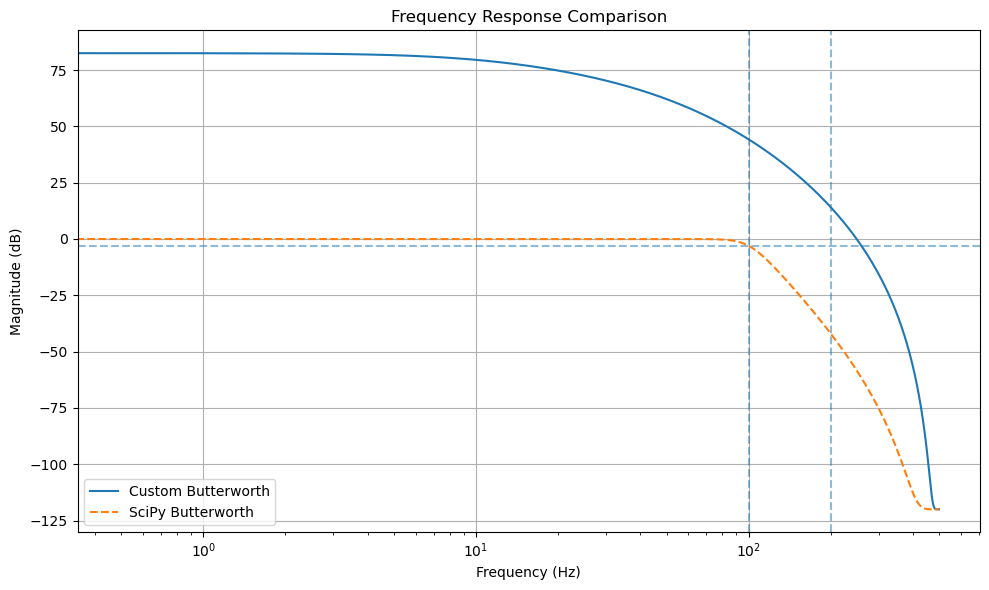

In [15]:
import scipy.signal as signal
import numpy as np
import matplotlib.pyplot as plt

# === Your custom Butterworth function ===
# Include the `design_butterworth()` function from above here

# === Validation setup ===
fs = 1000           # Sampling frequency (Hz)
order = 6          # Filter order
cutoff = 100        # Lowpass cutoff (Hz)
ftype = 'lowpass'   # Filter type

# Your custom filter coefficients (SOS)
custom_sos = design_butterworth(order, ftype, fs, cutoff)

# SciPy reference filter (matched settings)
nyq = fs / 2
scipy_sos = signal.butter(order, cutoff, btype=ftype, output='sos', fs=fs)

import numpy
print(numpy.array(scipy_sos))
print(numpy.array(custom_sos))

# === Frequency response comparison ===
def plot_sos_response(sos, label, style='-'):
    w, h = signal.sosfreqz(sos, worN=1024, fs=fs)
    plt.plot(w, 20 * np.log10(abs(h) + 1e-6), style, label=label)

plt.figure(figsize=(10, 6))
plot_sos_response(custom_sos, 'Custom Butterworth')
plot_sos_response(scipy_sos, 'SciPy Butterworth', '--')
plt.title('Frequency Response Comparison')
plt.xlabel('Frequency (Hz)')
plt.xscale('log')
plt.ylabel('Magnitude (dB)')
plt.axvline(cutoff, ls='--', alpha=0.5)
plt.axvline(cutoff*2, ls='--', alpha=0.5)
plt.axhline(-3.0, ls='--', alpha=0.5)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()